# 2440016804 - Rio Pramana - LA01 - Assignment 8

#### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
# Importing the dataset, downloaded file is in the same folder
csv_path = "cell_samples.csv"
cell_samp_df = pd.read_csv(csv_path)

#### Run a quick check on the dataset

In [3]:
cell_samp_df.shape

(699, 11)

In [4]:
cell_samp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


There are no missing data

In [5]:
cell_samp_df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
cell_samp_df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Column "BareNuc" is missing from the table above, so there must be something that's causing this

In [7]:
cell_samp_df["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

From the data above, we can see that there's a "?" value for "BareNuc" that are supposed to be integer values

So, we will treat this as missing data, and we'll replace it using the mean of the column

#### Replace missing values

In [8]:
#Replace '?' dengan NaN
cell_samp_df["BareNuc"].replace('?', np.NaN, inplace = True)

In [9]:
#Calculate mean while ignoring NaN value
barenuc_mean = int(np.nanmean(cell_samp_df["BareNuc"].astype('float'))) #Convert float (mean) to integer
#Replacing the NaN value with the mean
cell_samp_df["BareNuc"].replace(np.NaN, barenuc_mean, inplace = True)
#Make the type of the column to int again
cell_samp_df["BareNuc"] = cell_samp_df["BareNuc"].astype('int')

In [10]:
cell_samp_df["BareNuc"].value_counts()

1     402
10    132
3      44
2      30
5      30
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

As we can see, value_counts for '3' has gone up by 16, meaning we have successfully replaced '?' value to the mean which is '3'

#### Omit unnecessary column

Column 'ID' is not useful for what we want to do, column 'ID' is just used to identify each patients, but it is not useful for predicting the cancer class (benign or malignant)

So, we must omit the column 'ID' to improve the model

In [11]:
cell_samp_df.drop(columns = 'ID', inplace=True)

In [12]:
cell_samp_df.head(5)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


#### Splitting dataset

In [13]:
#Extracting independent variables:
X = np.array(cell_samp_df.drop(columns = 'Class'))
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [14]:
#Extracting dependent variable:
y = np.array(cell_samp_df["Class"])
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Define SVC

In [16]:
from sklearn import svm
svc = svm.SVC(kernel='rbf', C = 1, gamma = 0.01) #SVC with RBF kernel
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

## Predict Class benign or malignant using SVC Classifier with kernel RBF

In [17]:
y_pred = svc.predict(X_test)
y_pred

array([4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 4, 2, 2, 2], dtype=int64)

## Print Calculated Accuracy Score, Precision, recall, f1-score and support

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        95
           4       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



## Plot Confusion Matrix for Evaluation Result

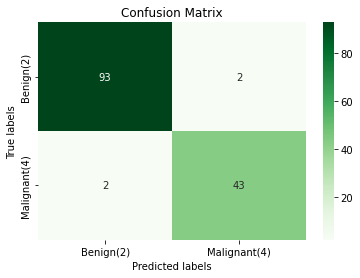

In [20]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'Greens');

# labels, title and ticks
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign(2)', 'Malignant(4)']); ax.yaxis.set_ticklabels(['Benign(2)', 'Malignant(4)']);
plt.show()